<a href="https://colab.research.google.com/github/zalfajhra/2025_VK_TI2C/blob/main/Jobsheet_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


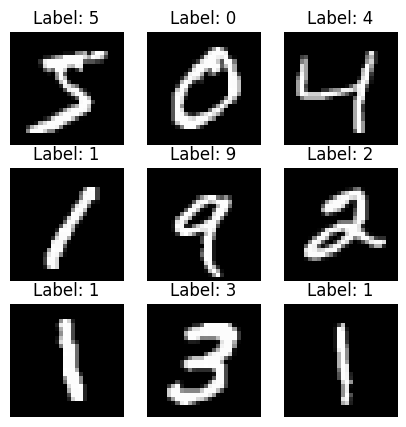

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

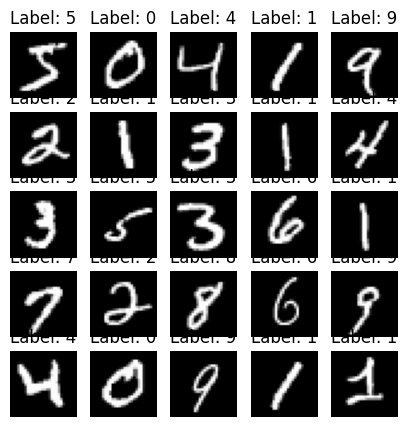

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subnet karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subnet karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


# Praktikum D3: Membangun CNN Dasar

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8987 - loss: 0.3442 - val_accuracy: 0.9827 - val_loss: 0.0694
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.9838 - val_loss: 0.0567
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9872 - val_loss: 0.0539
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9901 - loss: 0.0326 - val_accuracy: 0.9877 - val_loss: 0.0505
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9873 - val_loss: 0.0514


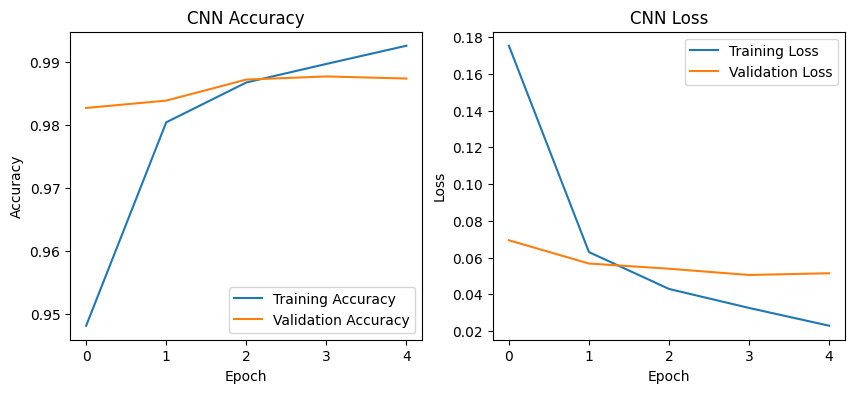

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8886 - loss: 0.3648 - val_accuracy: 0.9817 - val_loss: 0.0610
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9818 - loss: 0.0589 - val_accuracy: 0.9870 - val_loss: 0.0463
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9880 - loss: 0.0394 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9902 - val_loss: 0.0387
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9902 - val_loss: 0.0343


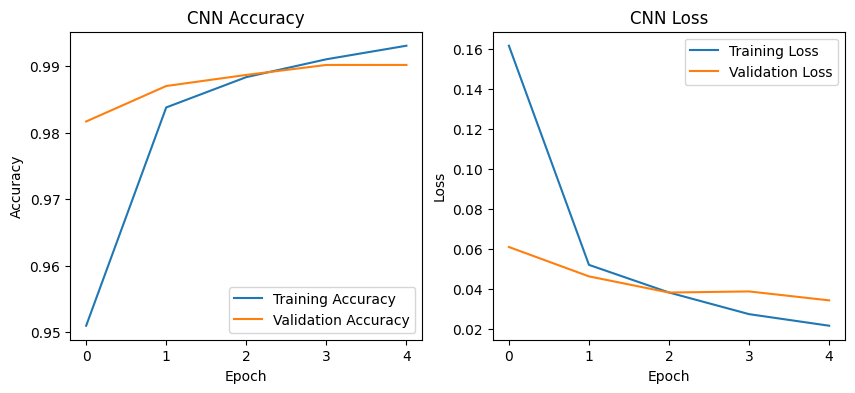

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum 4: Eksperimen dengan Dataset Lebih Komplek(CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.3592 - loss: 1.7642 - val_accuracy: 0.5332 - val_loss: 1.3529
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.5813 - loss: 1.1881 - val_accuracy: 0.6380 - val_loss: 1.0643
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.6479 - loss: 1.0258 - val_accuracy: 0.6466 - val_loss: 1.0245
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.6829 - loss: 0.9171 - val_accuracy: 0.6704 - val_loss: 0.9763
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 24ms/step - accuracy: 0.7055 - loss: 0.8604 - val_accuracy: 0.6866 - val_loss: 0.9152
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7263 - loss: 0.7896 - val_accuracy: 0.6924 - val_loss: 0.9114
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7397 - loss: 0.7399 - val_accuracy: 0.7002 - val_loss: 0.9135
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7538 -

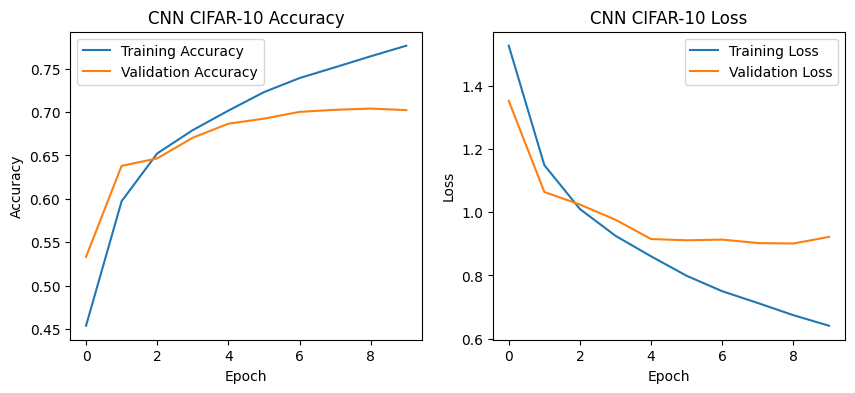

In [15]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.2871 - loss: 1.9112 - val_accuracy: 0.5012 - val_loss: 1.3862
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.4389 - loss: 1.5195 - val_accuracy: 0.5682 - val_loss: 1.2243
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.5020 - loss: 1.3792 - val_accuracy: 0.6124 - val_loss: 1.1203
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5338 - loss: 1.2812 - val_accuracy: 0.6132 - val_loss: 1.0836
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.5596 - loss: 1.2207 - val_accuracy: 0.6438 - val_loss: 1.0177
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.5766 - loss: 1.1792 - val_accuracy: 0.6632 - val_loss: 0.9693
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.5967 - loss: 1.1299 - val_accuracy: 0.6612 - val_loss: 0.9583
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6128 -

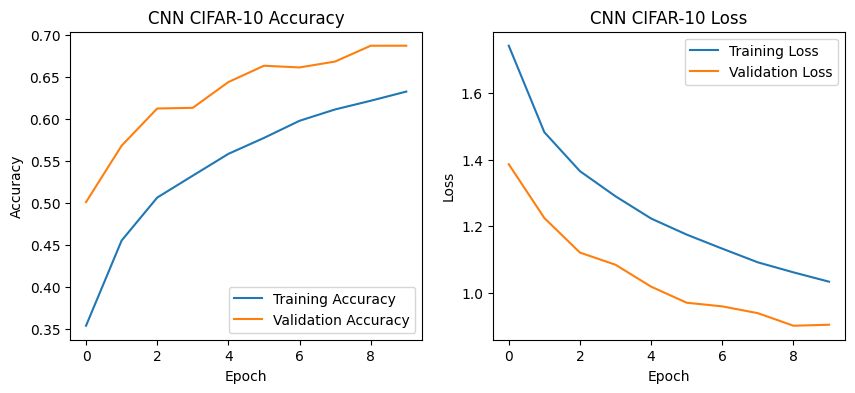

In [16]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5: Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 389s 276ms/step - accuracy: 0.4583 - loss: 1.5485 - val_accuracy: 0.5680 - val_loss: 1.2346
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 386s 275ms/step - accuracy: 0.5739 - loss: 1.2179 - val_accuracy: 0.5808 - val_loss: 1.1723
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 443s 275ms/step - accuracy: 0.5977 - loss: 1.1500 - val_accuracy: 0.5864 - val_loss: 1.1786
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 389s 276ms/step - accuracy: 0.6120 - loss: 1.1009 - val_accuracy: 0.6074 - val_loss: 1.1205
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 442s 276ms/step - accuracy: 0.6277 - loss: 1.0654 - val_accuracy: 0.6066 - val_loss: 1.1237


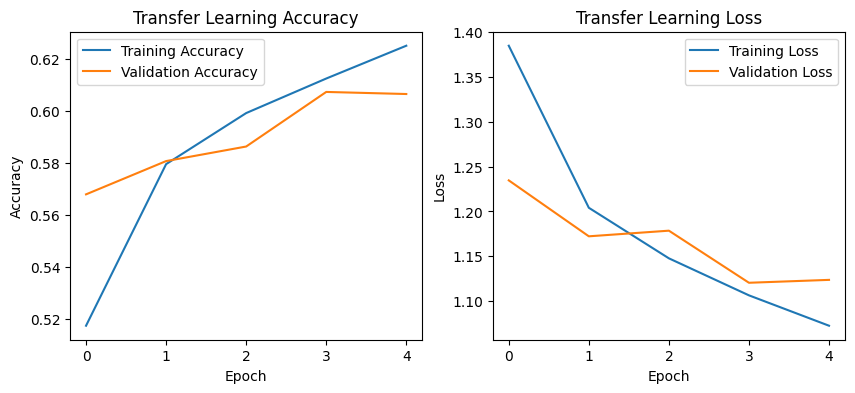

In [20]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 438s 310ms/step - accuracy: 0.5115 - loss: 1.4012 - val_accuracy: 0.6108 - val_loss: 1.1017
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 438s 307ms/step - accuracy: 0.6340 - loss: 1.0404 - val_accuracy: 0.6318 - val_loss: 1.0502
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 417s 296ms/step - accuracy: 0.6562 - loss: 0.9711 - val_accuracy: 0.6434 - val_loss: 1.0000
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 413s 294ms/step - accuracy: 0.6736 - loss: 0.9271 - val_accuracy: 0.6576 - val_loss: 0.9947
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 445s 296ms/step - accuracy: 0.6887 - loss: 0.8781 - val_accuracy: 0.6764 - val_loss: 0.9286


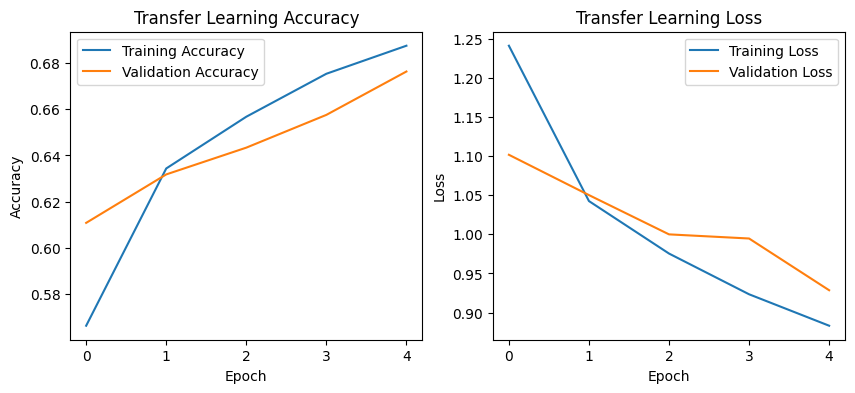

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = True

for layer in base_model.layers[:-2]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 244ms/step
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1000
           1       0.66      0.67      0.66      1000
           2       0.50      0.53      0.51      1000
           3       0.41      0.42      0.42      1000
           4       0.67      0.37      0.47      1000
           5       0.55      0.53      0.54      1000
           6       0.60      0.69      0.65      1000
           7       0.59      0.73      0.65      1000
           8       0.77      0.65      0.70      1000
           9       0.59      0.63      0.61      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



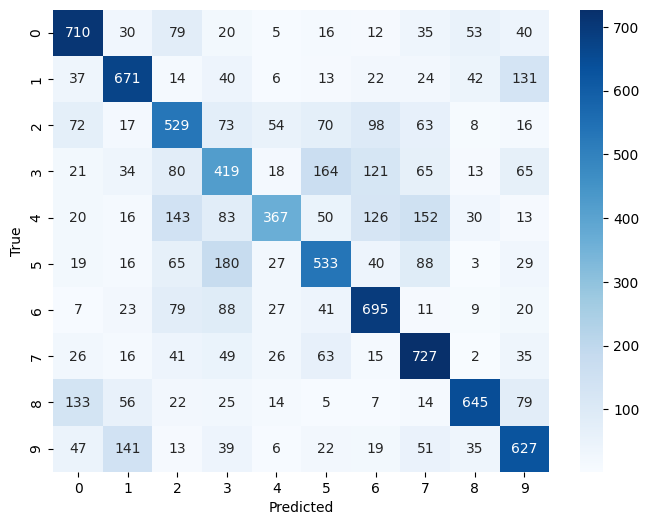

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
